# Introduction

A constrained satisfaction problem (CSP) consists of:
* A set of variables $X = {X_1,..., X_n}$
* A set of domains $D = {D_1,..., D_n}$, one for each variable $X$
 * a domain contain a set of values $D_i = \{val_1, ..., val_{m_i}\}$
* A set of constraints $C$ that limit the admissible values of the variables

## Definitions: 
* **State** or assignment of a CSP: a sequence of variable-value pairs
* **Consistent/legal** assignment: violates no constraints
* **Complete** assignment: all the variables have an associated value
* **Solution** of a CSP: a complete and consistent assignment


## Example

* **Variables**: {WA, NT, Q, NSW, V, SA, T}
* **Domains**: {red, green, blue}
* **Constraints**: adjacent regions must have different colors. 
E.g.: 
* WA $\ne$ NT, or
* (WA,NT) = {(red, green), (red, blue), (green, red), (green, blue), ... } 


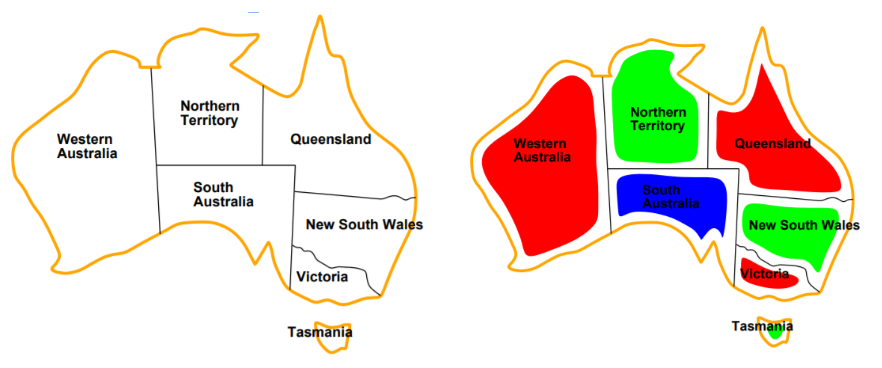

* **Graph of constraints**: nodes represent the variable, arcs represent the constraints
* Graphs are used by the algorithms to speed up the search of the solution


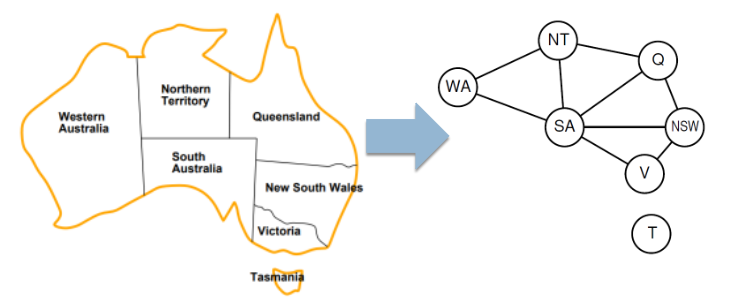

## Applications
* **Scheduling problems**:
 * e.g. class scheduling, industrial activities, etc.
* **Logistics**:
 * Assignment of resources
* ... and many others

Available solvers:
* Backtracking
* Recursive backtracking
* Minimum conflicts

Predifined constraints: e.g.,
* AllDifferentConstraint
* AllEqualConstraint
* MinSumConstraint

Features:
* **Lambda expressions** to define constraints

In [1]:
!pip install python-constraint

## Lambda expressions

* The solver adopts the lambda operator to model constraints

* Create anonymous functions for constraints evaluation


The anonymous function:

`lambda arguments:expression`

Is equivalent to:
```
def fun_name(arguments):
    return expression
```
Except that a function name is **not** provided.

In [2]:
def f(x):
    return x**2

print(f(10))

100


In [3]:
lambda x: x**2

<function __main__.<lambda>(x)>

In [4]:
( lambda x: x**2 ) ( 10 )

100

In [5]:
g = lambda x: x**2
print(g(10))

100


**Why lambda functions are useful?**
* To define higher-order functions (e.g. functions that manipulate and/or create functions)
* For defining Lambda calculus (used in computer science for abstracting how a machine operates)

An example:

In [6]:
def incrementer(n):
    return lambda x: x + n

f100 = incrementer(100)
print(f100(5))
print(f100(1))

105
101


Some esotheric examples:

In [7]:
w = lambda x: x(x)

In [8]:
w(lambda z: 1)

1

# CSP example
Model and solve the following problem:
* $X = \{x, y\}$
* $D_x = [0,1,2,3]$, $D_y = [0,4,5,6]$
* $y = x * 2$ 

Solution:

In [11]:
from constraint import *

problem = Problem()
# set variables and domains
problem.addVariable('x', [0,1,2,3])
problem.addVariable('y', [0,4,5,6])
# model a constraint on x,y variables
problem.addConstraint(
    lambda a,b: a*2 == b,  # a,b, formal arguments of the annonymous function
    ('x', 'y')  # variable names used in the actual constraint (binding)
)
solutions = problem.getSolutions()
print(solutions)


[{'x': 3, 'y': 6}, {'x': 2, 'y': 4}, {'x': 0, 'y': 0}]


In [12]:
from constraint import *

problem = Problem()
# set variables and domains
problem.addVariable('x', [0,1,2,3])
problem.addVariable('y', [0,4,5,6])
# model a constraint on x,y variables
problem.addConstraint(
    lambda a,b: a*2 == b,  # a,b, formal arguments of the annonymous function
    ('x', 'y')  # variable names used in the actual constraint (binding)
)
problem.addConstraint(AllDifferentConstraint())
solutions = problem.getSolutions()
print(solutions)


[{'x': 3, 'y': 6}, {'x': 2, 'y': 4}]


# Map coloring problem

## Example
By using `python-constraint`, you can specify variables and constraint as follows.


In [14]:
from constraint import Problem

problem = Problem()

domain = ["RED", "BLUE", "GREEN"]

problem.addVariable("wa", domain)
problem.addVariable("nt", domain)
problem.addVariable("q", domain)
problem.addVariable("sa", domain)
problem.addVariable("nsw", domain)
problem.addVariable("v", domain)
problem.addVariable("t", domain)

problem.addConstraint(lambda a, b: a != b, ["wa", "nt"])
problem.addConstraint(lambda a, b: a != b, ["wa", "sa"])
problem.addConstraint(lambda a, b: a != b, ["nt", "sa"])
problem.addConstraint(lambda a, b: a != b, ["nt", "q"])
problem.addConstraint(lambda a, b: a != b, ["sa", "q"])
problem.addConstraint(lambda a, b: a != b, ["nsw", "q"])
problem.addConstraint(lambda a, b: a != b, ["nsw", "sa"])
problem.addConstraint(lambda a, b: a != b, ["nsw", "v"])
problem.addConstraint(lambda a, b: a != b, ["v", "sa"])

solutions = problem.getSolution()
print(solutions)

{'sa': 'GREEN', 'nsw': 'BLUE', 'q': 'RED', 'nt': 'BLUE', 'v': 'RED', 'wa': 'RED', 't': 'GREEN'}


## Exercise 1: NetworkX
Using a NetworkX graph, specify the appropriate variables and constraints. 

You need to assign to each node a value, from a domain specified. Two adjacent nodes can't have the same assignment.



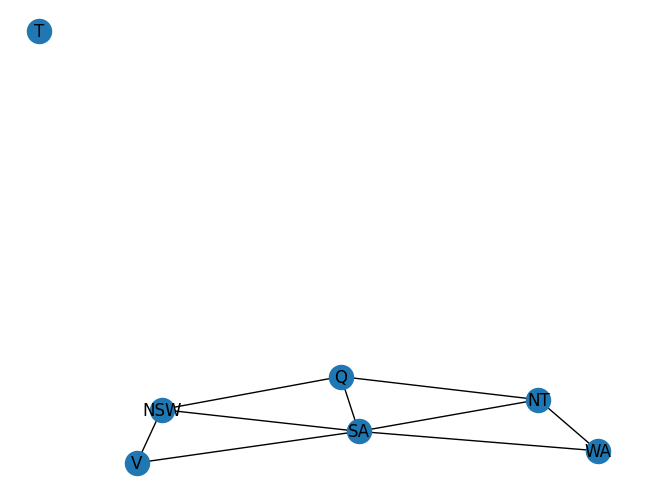

In [15]:
from constraint import Problem
import networkx as nx
import matplotlib.pyplot as plt

color_map = {0: '#ff9999', 1: '#9999ff', 2: '#99ff99'}
domain = [0, 1, 2]

G = nx.Graph()

nodelist = ["WA", "NT", "Q", "SA", "NSW", "V", "T"]
G.add_nodes_from(nodelist)

edges = [("WA", "NT"), ("WA", "SA"), ("NT", "Q"), ("NT", "SA"), ("Q", "SA"), ("Q", "NSW"),
         ("NSW", "SA"), ("NSW", "V"), ("V", "SA")]
G.add_edges_from(edges)

problem = Problem()
nx.draw(G, with_labels=True)

In [16]:
#@title Solution { form-width: "10px" }
for node in G.nodes():
    problem.addVariable(node, domain)

    for n in G.neighbors(node):
        problem.addConstraint(lambda a, b: a != b, [node, n])

{'SA': 2, 'NSW': 1, 'Q': 0, 'NT': 1, 'V': 0, 'WA': 0, 'T': 2}


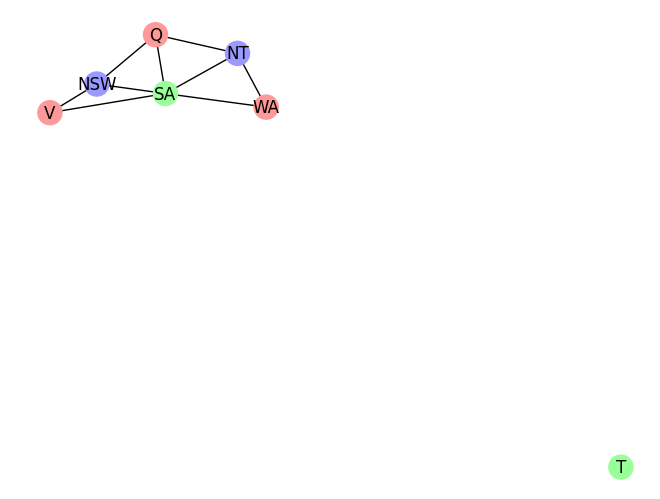

In [17]:
solution = problem.getSolution()
print(solution)

colors = []
for node in G.nodes():
    colors.append(solution[node])
colors = [color_map[c] for c in colors]
nx.draw(G, node_color=colors, with_labels=True)
plt.show()

## Exercise 2: Backtracking
Implement the following backtracking algorithm. The overall structure is given, all the inner functions need to be written for the graph coloring problem. Tip: keep it simple!

```
function BACKTRACKING-SEARCH(csp) returns a solution, or failure
    return BACKTRACK( { }, csp )

function BACKTRACK(assignment, csp) returns a solution, or failure
    if assignment is complete then return assignment
    var ← SELECT-UNASSIGNED-VARIABLE(csp)
    for each value in ORDER-DOMAIN-VALUES(var, assignment, csp) do
        if value is consistent with assignment then
            add {var = value} to assignment
            result ← BACKTRACK(assignment, csp)
            if result ≠ failure then return result
            remove {var = value} from assignment

    return failure
```

In [18]:
import networkx as nx
G = nx.Graph()

nodelist = ["WA", "NT", "Q", "SA", "NSW", "V", "T"]
domain_list = set([1, 2, 3])

color_map = {1: '#ff9999', 2: '#99ff99', 3: '#9999ff'}

for i in nodelist:
    G.add_node(i, domain=domain_list)

edges = [("WA", "NT"), ("WA", "SA"), ("NT", "Q"), ("NT", "SA"), ("Q", "SA"),
         ("Q", "NSW"), ("NSW", "SA"), ("NSW", "V"), ("V", "SA")]
G.add_edges_from(edges)

print(G.nodes(data=True))


[('WA', {'domain': {1, 2, 3}}), ('NT', {'domain': {1, 2, 3}}), ('Q', {'domain': {1, 2, 3}}), ('SA', {'domain': {1, 2, 3}}), ('NSW', {'domain': {1, 2, 3}}), ('V', {'domain': {1, 2, 3}}), ('T', {'domain': {1, 2, 3}})]


In [19]:
from constraint import *
import networkx as nx
import matplotlib.pyplot as plt



def is_complete(assignment, csp):
    pass


def is_consistent(val, var, assignment, csp):
    pass


def select_unassigned_variable(assignment, csp):
    pass


def order_domain_values(var, assignment, csp):
    pass

def backtracking_search(csp):
    return backtracking({}, csp)


def backtracking(assignment, csp, n_failures=0):
    if is_complete(assignment, csp):
        return assignment, n_failures

    var = select_unassigned_variable(assignment, csp)

    for val in order_domain_values(var, assignment, csp):
        if is_consistent(val, var, assignment, csp):
            assignment[var] = val

            ris, m_failures = backtracking(assignment, csp)
            if ris is not None:
                return ris, n_failures + m_failures
                        
            n_failures += m_failures + 1
            # else, that's a failure and we need to remove the assignment
            del assignment[var]

    return None, n_failures

In [20]:
#@title Solution { form-width: "10px" }
import networkx as nx
import matplotlib.pyplot as plt



def is_complete(assignment, csp):
    return len(assignment) == len(csp.nodes())


def is_consistent(val, var, assignment, csp):
    # the current assignment is (locally) consistent 
    # if all the neighbors of the current node
    # have a different assignment (i.e. no different colors)
    for neighbor in csp.neighbors(var):
        if neighbor in assignment and assignment[neighbor] == val:
            return False
    return True


def select_unassigned_variable(assignment, csp):
    for n in csp.nodes():
        if n not in assignment:
            return n


def order_domain_values(var, assignment, csp):
    # keep the same order
    return list(csp.nodes[var]['domain'])


def backtracking_search(csp):
    result = backtracking({}, csp)
    return result


def backtracking(assignment, csp, n_failures=0):
    if is_complete(assignment, csp):
        return assignment, n_failures

    var = select_unassigned_variable(assignment, csp)

    for val in order_domain_values(var, assignment, csp):
        if is_consistent(val, var, assignment, csp):
            assignment[var] = val

            ris, m_failures = backtracking(assignment, csp)
            if ris is not None:
                return ris, n_failures + m_failures
                        
            n_failures += m_failures + 1
            # else, that's a failure and we need to remove the assignment
            del assignment[var]

    return None, n_failures




{'WA': 1, 'NT': 2, 'Q': 1, 'SA': 3, 'NSW': 2, 'V': 1, 'T': 1}


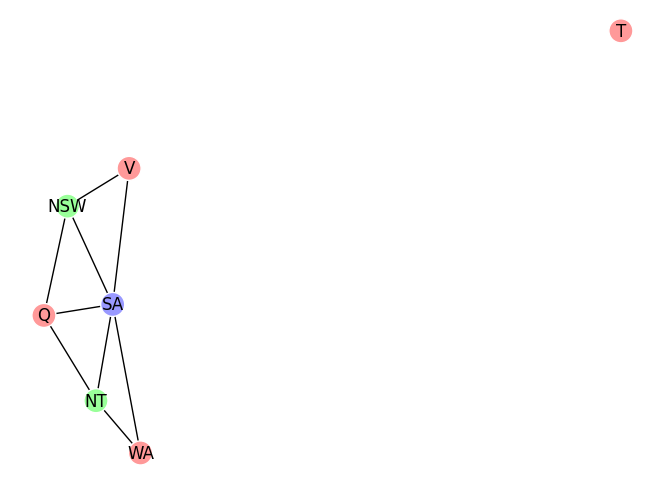

failures: 0


In [21]:
import matplotlib.pyplot as plt

n_failures = 0

assignment, n_failures = backtracking_search(G)
print(assignment)
colors = [color_map[assignment[node]] for node in G]

nx.draw(G, node_color=colors, with_labels=True)
ax = plt.gca()
ax.collections[0].set_edgecolor("#ffffff")
plt.show()
print("failures:", n_failures)

## Exercise 3: Backtracking on a bigger graph
While even simple strategies are effective in small graphs, it is needed to use more advanced strategies for bigger graphs.

Using your previous implementation, check the backtracking performance of your solution.

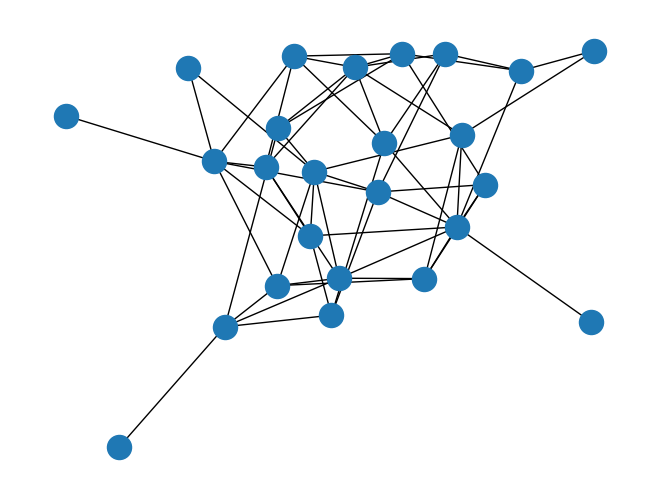

In [22]:
G2 = nx.erdos_renyi_graph(25, 0.2, seed=42)
nx.draw(G2)
domain_list = [1, 2, 3, 4]
color_map = {1: '#ff9999', 2: '#99ff99', 3: '#9999ff', 4:'#ffdd99'}

nx.set_node_attributes(G2, domain_list, "domain")

2534


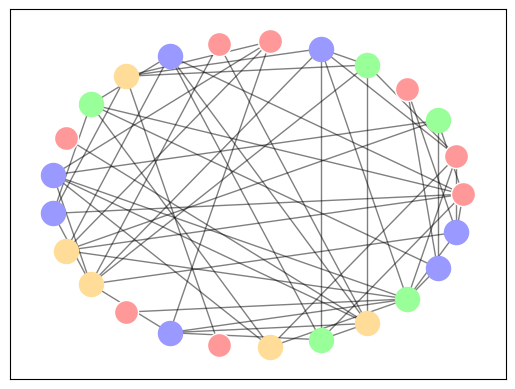

In [23]:
assignment, n_fails = backtracking_search(G2)

print(n_fails)
colors = [color_map[assignment[node]] for node in G2]

pos=nx.circular_layout(G2)

# nx.draw(G2, node_color=colors, with_labels=True, pos=pos)

for i in range(4):
    nx.draw_networkx_nodes(G2, pos, nodelist=[n for n in G2.nodes() if assignment[n] == i+1], node_color=color_map[i+1])

nx.draw_networkx_edges(G2, pos, width=1.0, alpha=0.5)

ax = plt.gca()
ax.collections[0].set_edgecolor("#ffffff")
plt.show()


Now, reimplement the `select_unassigned_variable` function using the **most constrained variable** strategy, i.e., you need to choose the variable with the fewest legal values.


In [24]:
def legal_values(var, assignment, csp):
    pass

def select_unassigned_variable_mcv(assignment, csp):
    pass

In [25]:
#@title Solution { form-width: "10px" }
def legal_values(var, assignment, csp):
    assigned_neighbors = [neighbor for neighbor in csp.neighbors(var) if neighbor in assignment]
    assigned_values = [assignment[variable] for variable in assigned_neighbors]
    return [value for value in csp.nodes()[var]['domain'] if value not in assigned_values]

def select_unassigned_variable_mcv(assignment, csp):
    variables_lv = [(variable, len(legal_values(variable, assignment, csp))) for variable in csp.nodes() if variable not in assignment]
    if len(variables_lv) == 0:
      return None
    variables_lv.sort(key=lambda x: x[1])
    return variables_lv[0][0]   



In [26]:
def backtracking(assignment, csp, n_failures=0):
    if is_complete(assignment, csp):
        return assignment, n_failures

    var = select_unassigned_variable_mcv(assignment, csp)

    for val in order_domain_values(var, assignment, csp):
        if is_consistent(val, var, assignment, csp):
            assignment[var] = val

            ris, m_failures = backtracking(assignment, csp)
            if ris is not None:
                return ris, n_failures + m_failures
                        
            n_failures += m_failures + 1
            # else, that's a failure and we need to remove the assignment
            del assignment[var]

    return None, n_failures

0


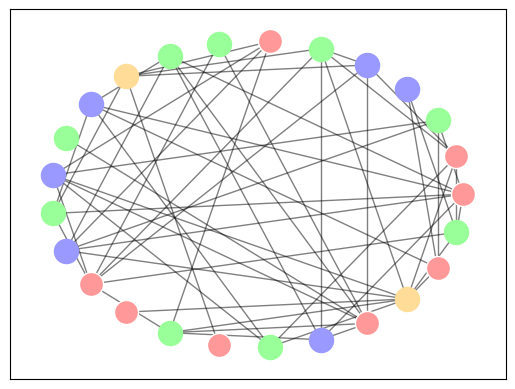

In [27]:
assignment, n_fails = backtracking_search(G2)

print(n_fails)
colors = [color_map[assignment[node]] for node in G2]

pos=nx.circular_layout(G2)


for i in range(4):
    nx.draw_networkx_nodes(G2, pos, 
                           nodelist=[n for n in G2.nodes() if assignment[n] == i+1],
                           node_color=color_map[i+1],
                           node_size=300)

nx.draw_networkx_edges(G2, pos, width=1.0, alpha=0.5)

ax = plt.gca()
ax.collections[0].set_edgecolor("#ffffff")
plt.show()


# Exercise 4: N-Queen puzzle

Model and solve the problem of having $N$ queens on a chessboard so that none of them is under attack.

The solution should return only the first solution found by the solver.

Queens can attack:
* Horizontally
* Vertically
* Diagonally

You can use the python-constraint library (but probably you can have better performance by implementing the backtracking algorithm yourself!)

In [28]:
from constraint import *

n = 8
problem = Problem()


In [29]:
def print_sol(solution, n=n):
    pass

solutions = problem.getSolution()
print(solutions)
print_sol(solutions)

    


None


In [30]:
#@title Solution { form-width: "10px" }
from constraint import *

n = 8
problem = Problem()

domain = [(x,y) for x in range(8) for y in range(8)]
for i in range(n):
  problem.addVariable(i, domain)
for i in range(n):
  for j in range(i+1,n):
    # different columns
    problem.addConstraint(lambda a,b: a[0] != b[0], [i,j])
    # different rows
    problem.addConstraint(lambda a,b: a[1] != b[1], [i,j])
    # same sign diagonal
    problem.addConstraint(lambda a,b: abs(a[0]-b[0]) != abs(a[1]-b[1]), [i,j])

def print_sol(solution, n=n):
    cells = ['-' for _ in range(64)]
    for i in solution:
      pos = solution[i]
      index = 8*pos[0]+pos[1]
      cells[index] = str(i)
    for i in range(8):
      row = ''
      for j in range(8):
        row = row + cells[8*i+j] + ' '
      print(row)

solutions = problem.getSolution()
print(solutions)
print_sol(solutions)

{0: (7, 7), 1: (6, 3), 2: (4, 2), 3: (3, 5), 4: (1, 6), 5: (5, 0), 6: (2, 1), 7: (0, 4)}
- - - - 7 - - - 
- - - - - - 4 - 
- 6 - - - - - - 
- - - - - 3 - - 
- - 2 - - - - - 
5 - - - - - - - 
- - - 1 - - - - 
- - - - - - - 0 



### Explanation

* Define $N$ variables, representing $Q_1, ..., Q_N$ queens.
* The value assigned to each queen can be a tuple $(row, col)$ representing the cell where the queen is positioned.
* We define the domain for each queen as $D_{i} = \{(1,1),(1,2),...,(1,N),(2,1),...,(N,N)\}$.
* Then, we need to specify that, for each distinct $Q_i$ and $Q_j$ (i.e., $i \ne j$), $Q_i$ and $Q_j$ do not fall on the same column or row. This is done by checking $Q_i.col \ne Q_j.col$ and $Q_i.row \ne Q_j.row$
* Finally, we need a constraint for checking queens in diagonal. A queen $Q_i$ lies on the same diagonal of $Q_j$ iff $|Q_i.row-Q_j.row| = |Q_i.col - Q_j.col| $

In [31]:
#@title Solution2 { form-width: "10px" }

from constraint import *

n = 8
problem = Problem()

for i in range(n):
  domain = [(i,y) for y in range(8)]
  problem.addVariable(i, domain)
for i in range(n):
  for j in range(i+1,n):
    # different rows
    problem.addConstraint(lambda a,b: a[1] != b[1], [i,j])
    # same sign diagonal
    problem.addConstraint(lambda a,b: abs(a[0]-b[0]) != abs(a[1]-b[1]), [i,j])

solutions = problem.getSolution()
print(solutions)
print_sol(solutions)

{0: (0, 7), 1: (1, 3), 2: (2, 0), 3: (3, 2), 6: (6, 6), 4: (4, 5), 5: (5, 1), 7: (7, 4)}
- - - - - - - 0 
- - - 1 - - - - 
2 - - - - - - - 
- - 3 - - - - - 
- - - - - 4 - - 
- 5 - - - - - - 
- - - - - - 6 - 
- - - - 7 - - - 



### Explanation

* We can do better! 
* Using $D_{i} = \{ (i, 1), (i, 2), ..., (i, N)\}$ we already impose that there is only one queen for each row.
* Then, we need to specify that, for each distinct $Q_i$ and $Q_j$ (i.e., $i \ne j$), $Q_i$ and $Q_j$ do not fall on the same column. This is done by checking the second component (i.e. $Q_i.col \ne Q_j.col$)  
* Finally, we need a constraint for checking queens in diagonal. A queen $Q_i$ lies on the same diagonal of $Q_j$ iff $|Q_i.row-Q_j.row| = |Q_i.col - Q_j.col| $